In [2]:
import os
import numpy as np
import jax.numpy as jnp
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import pickle as pkl

/Users/ryankelly/python_projects/rsnl/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Set the default font to Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [4]:
def calculate_coverage(directory, true_param):
    # true_param = jnp.array([0.0])
    # directory = '../res/misspec_ma1/rsnl/'
    sub_dirs = [x[0] for x in os.walk(directory)]
    sub_dirs = sub_dirs[1:]
    total_coverage = np.zeros(21)
    count_successful = 0
    for sub_dir in sub_dirs:
        try:
            with open(f'{sub_dir}/thetas.pkl', 'rb') as f:
                print('sub_dir: ', sub_dir)
                thetas = jnp.array(pkl.load(f))
                thetas = jnp.concatenate(thetas, axis=0)
                thetas = jnp.transpose(thetas)
                thetas_kernel = thetas[:, ::10]  # THIN BY 10
                # plt.hist(thetas_kernel, bins=30)
                # plt.show()
                thetas_kernel_eval = thetas[:, 1::10]  # THIN BY 10
                kde = gaussian_kde(thetas_kernel, bw_method='silverman')
                true_theta_pdf = kde.logpdf(true_param)
                print('true_theta_pdf: ', true_theta_pdf)
                theta_draws_pdf = kde.logpdf(thetas_kernel_eval)
                theta_draws_pdf = jnp.sort(theta_draws_pdf)[::-1]
                # test_xs = jnp.linspace(0.8, 1.2, 1000)
                # test_ys = kde.logpdf(test_xs)
                # plt.plot(test_xs, test_ys)
                # plt.axvline(x=true_param, color='red')
                # plt.show()
                N = len(theta_draws_pdf)
                print('N: ', N)
                x = jnp.linspace(0, 1, 21)
                indices = round(x * N) - 1
                print('indices: ', indices)
                print('theta_draws_pdf[indices]: ', theta_draws_pdf[indices])
                coverage = theta_draws_pdf[indices] < true_theta_pdf
                coverage = np.array(coverage, dtype=int)
                coverage[0] = 0
                coverage[-1] = 1
                total_coverage += coverage
                count_successful += 1
                print('coverage: ', coverage)
        except Exception as e:
            print(e)
            continue
    print('count_successful: ', count_successful)
    total_coverage = total_coverage / count_successful
    return total_coverage

In [5]:
def plot_and_save_coverages(empirical_coverage_rsnl=None, empirical_coverage_snl=None,
                            title="",
                            folder_name=""):
    """Plot coverage."""
    plt.clf()
    plt.plot([0, 1], [0, 1], color='gray', linestyle='dashed')
    if empirical_coverage_rsnl is not None:
        plt.plot(np.linspace(0, 1, len(empirical_coverage_rsnl)), empirical_coverage_rsnl,
                label='RSNL')
    if empirical_coverage_snl is not None:
        plt.plot(np.linspace(0, 1, len(empirical_coverage_snl)), empirical_coverage_snl,
                label='SNL', linestyle='dashed')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xticks([0, 1], fontsize=35)
    plt.yticks([0, 1], fontsize=35)
    plt.xlabel("Credibility level", fontsize=35)
    plt.ylabel("Empirical coverage", fontsize=35)
    plt.legend(fontsize=35, borderpad=0.1, labelspacing=0.1, handletextpad=0.1)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"{folder_name}empirical_coverage.pdf", bbox_inches='tight')


In [ ]:
true_param = jnp.array([1.0])

directory = '../res/contaminated_normal/rsnl/'
empirical_coverage_rsnl = calculate_coverage(directory, true_param)

directory = '../res/contaminated_normal/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param)

In [ ]:
plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        # title="Contaminated normal"
                        folder_name='contaminated_normal_'
                        )

In [ ]:
true_param = jnp.array([0.0])

directory = '../res/misspec_ma1/rsnl/'
empirical_coverage_rsnl = calculate_coverage(directory, true_param)

directory = '../res/misspec_ma1/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param)

plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        folder_name='misspec_ma1_'
                        )

In [ ]:
# true_param = jnp.array([0.7, -2.9, -1.0, -0.9, 0.6])

# directory = '../res/contaminated_slcp/rsnl/'
# empirical_coverage_rsnl = calculate_coverage(directory, true_param)

# directory = '../res/contaminated_slcp/snl/'
# empirical_coverage_snl = calculate_coverage(directory, true_param)

# plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
#                         # title="Contaminated SLCP",
#                         folder_name='contaminated_slcp_'
#                         )

In [ ]:
directory = '../res/sir/rsnl/'
true_param = jnp.array([.1, .15])
empirical_coverage_rsnl = calculate_coverage(directory, true_param)

directory = '../res/sir/snl/'
empirical_coverage_snl = calculate_coverage(directory, true_param)
plot_and_save_coverages(empirical_coverage_rsnl, empirical_coverage_snl,
                        folder_name='sir_'
                        # title="SIR"
                        )

In [6]:
directory = "../res/contaminated_normal/rsnl_well_specified/"
true_param = jnp.array([1.0])
empirical_coverage_rsnl_well_specified = calculate_coverage(directory,
                                                            true_param)

directory = "../res/contaminated_normal/snl_well_specified/"
empirical_coverage_snl_well_specified = calculate_coverage(directory,
                                                           true_param)


sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_156
true_theta_pdf:  [0.33974353]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-4.048677    1.5343573   1.5311444   1.5255942   1.5151937   1.4982674
  1.4754926   1.4518353   1.4301876   1.403971    1.3685132   1.3121295
  1.2478322   1.1563735   1.0697495   0.9653802   0.824707    0.5963647
  0.25342566 -0.2519102  -4.048677  ]
coverage:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
sub_dir:  ../res/contaminated_normal/rsnl_well_specified/seed_151
true_theta_pdf:  [0.89945017]
N:  4000
indices:  [  -1  199  399  599  799  999 1199 1399 1599 1799 1999 2199 2399 2599
 2799 2999 3199 3399 3599 3799 3999]
theta_draws_pdf[indices]:  [-7.111626    1.596609    1.5856509   1.5682086   1.5460632   1.5195398
  1.4906075   1.4543262   1.410781    1.3602104   1.3029444   1.2346691
  1.1646917   1.0764786   0.96013904  0.8264409

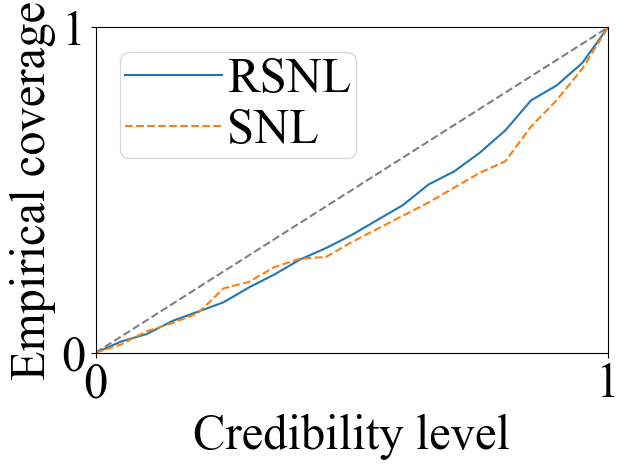

In [7]:
plot_and_save_coverages(empirical_coverage_rsnl_well_specified,
                        empirical_coverage_snl_well_specified,
                        folder_name='well_specified_normal_'
                        # title="SIR"
                        )
